In [2]:
import pickle
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
base_path = './full_train/'
pickle_files = [base_path + n for n in  os.listdir(base_path) if '.pkl' in n]

In [4]:
def open_report(pickle_file, verbose=True):
    with open(pickle_file, 'br') as f:
        report = pickle.load(f)

    if verbose:
        print('\nfile_name: {}\nmodel:{}'.format(pickle_file, report['model']))
    
    report['file_name'] = pickle_file
    
    return report


In [5]:
reports = [open_report(fname) for fname in pickle_files]

    


file_name: ./full_train/0a7a2881-8f74-4578-8619-5542a1c0a411.pkl
model:['models.base.InputLayer((?, 50, 200, 3) -> (?, 50, 200, 3))', 'models.base.LinearReshapeLayer((?, 50, 200, 3) -> (?, 30000))', 'models.base.DropOutLayer((?, 30000) -> (?, 30000))', 'models.linear.LinearMultiCharOutputLayer((?, 30000) -> (?, 5, 36))']

file_name: ./full_train/c03d884c-b8a4-4b41-992b-fb44d490df4b.pkl
model:['models.base.InputLayer((?, 50, 200, 3) -> (?, 50, 200, 3))', 'models.conv.ConvLayer((?, 50, 200, 3) -> (?, 46, 196, 6))', 'models.base.DropOutLayer((?, 46, 196, 6) -> (?, 46, 196, 6))', 'models.conv.ConvLayer((?, 46, 196, 6) -> (?, 21, 96, 12))', 'models.base.DropOutLayer((?, 21, 96, 12) -> (?, 21, 96, 12))', 'models.conv.ConvLayer((?, 21, 96, 12) -> (?, 8, 46, 36))', 'models.base.DropOutLayer((?, 8, 46, 36) -> (?, 8, 46, 36))', 'models.conv.ConvLayer((?, 8, 46, 36) -> (?, 2, 21, 12))', 'models.base.DropOutLayer((?, 2, 21, 12) -> (?, 2, 21, 12))', 'models.base.LinearReshapeLayer((?, 2, 21, 12) -

(a) = RMchD
(b) = C5o6C5o12C5o36C5o12MaxRfl100MchD
(c) = C5o6C5o12C5o36C5o36Rfl200MchD
(d) = C5o6C5o12C5o36C5o36Rfl100MchD
(e) = C5o6RMchD
(f) = C5o6C5o12RMchD
(a) = RMchD
(b) = C5o6C5o12C5o36C5o12MaxRfl100MchD
(c) = C5o6C5o12C5o36C5o36Rfl200MchD
(d) = C5o6C5o12C5o36C5o36Rfl100MchD
(e) = C5o6RMchD
(f) = C5o6C5o12RMchD


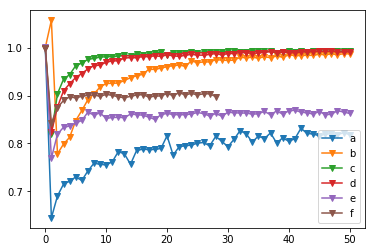

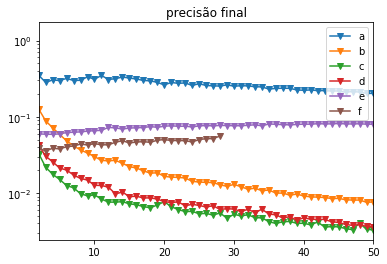

In [10]:
plt.figure()

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for k, report in enumerate(reports):

    #df_train = report['df_train']
    df_test = report['df_test']
    
    #plt.plot(df_train['epoch'], df_train['loss_avg'])
    #plt.plot(df_test['epoch'], df_test['loss_avg'])
    
    color = colors[k]
    #plt.plot(df_test['epoch'], df_test['wprob'], **{'marker': '^', 'ls': '',  'c': color})#'{}^'.format(colors[k]))
    #plt.plot(df_test['epoch'], df_test['wacc'], **{'marker': 'v', 'ls': '',  'c': color})#'{}v'.format(colors[k]))
    
    #plt.plot(df_test['epoch'], np.log2((df_test['wacc'] - df_test['wprob'])/df_test['wacc']), label='abcdefghi'[k], **{'marker': 'v', 'ls': '-',  'c': color})#'{}v'.format(colors[k]))
    
    wacc = df_test['wacc']
    wprob = df_test['wprob']
    
    #y = np.log2((wacc - wprob)/wacc)
    
    #y = #wacc * np.log2(wprob) + (1-wacc) * np.log2(1 - wprob)
    #y = - wprob * np.log2(wacc) - (1 - wprob) * np.log2(1 - wacc)

    def KLDivergence(P, Q):
        sdklist = []
        for i, (p, q) in enumerate(zip(P, Q)):
            sdk = 0 if p == 0 else p*np.log2(p/q)
            sdk += 0 if p == 1 else (1-p) * np.log2((1-p)/(1-q))
            sdklist.append(sdk)
        
        return np.array(sdklist)
        #return (P * np.log2(P/Q)) + ((1-P)*np.log2((1-P)/(1-Q))) 
        
    #y = df_test['wacc']
    #y = KLDivergence(wacc, wprob)
    
    y = (wprob + 1e-4)/(wacc + 1e-4)
    
    plt.plot(df_test['epoch'], y, label='abcdefghi'[k], **{'marker': 'v', 'ls': '-',  'c': color})#'{}v'.format(colors[k]))
   
    #if len(df_test['epoch']) == 3:
    #    print(report['file_name'])
    
    print('({}) = {}'.format('abcdefghi'[k], report['model_name']))
    
    #plt.yscale('log')
    #plt.xlabel('epoca')
    #plt.ylabel('log(J)')
    #plt.title(report['model_name'])
    #plt.xlim([0, 50])
    plt.legend()
    #plt.yscale('log')
    #plt.ylim([1e-4, 1e-1])


    
plt.figure()

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for k, report in enumerate(reports):

    #df_train = report['df_train']
    df_test = report['df_test']
    
    #plt.plot(df_train['epoch'], df_train['loss_avg'])
    #plt.plot(df_test['epoch'], df_test['loss_avg'])
    
    color = colors[k]
    #plt.plot(df_test['epoch'], df_test['wprob'], **{'marker': '^', 'ls': '',  'c': color})#'{}^'.format(colors[k]))
    #plt.plot(df_test['epoch'], df_test['wacc'], **{'marker': 'v', 'ls': '',  'c': color})#'{}v'.format(colors[k]))
    
    #plt.plot(df_test['epoch'], np.log2((df_test['wacc'] - df_test['wprob'])/df_test['wacc']), label='abcdefghi'[k], **{'marker': 'v', 'ls': '-',  'c': color})#'{}v'.format(colors[k]))
    
    wacc = df_test['wacc']
    wprob = df_test['wprob']
    
    y = df_test['loss_avg']
    
    #y = #wacc * np.log2(wprob) + (1-wacc) * np.log2(1 - wprob)
    #y = - wprob * np.log2(wacc) - (1 - wprob) * np.log2(1 - wacc)

    def KLDivergence(P, Q):
        return (P * np.log2(P/Q)) + ((1-P)*np.log2((1-P)/(1-Q))) 
    
    #y = KLDivergence(wacc, wprob)
    
    plt.plot(df_test['epoch'], y, label='abcdefghi'[k], **{'marker': 'v', 'ls': '-',  'c': color})#'{}v'.format(colors[k]))
   
    #if len(df_test['epoch']) == 3:
    #    print(report['file_name'])
    
    print('({}) = {}'.format('abcdefghi'[k], report['model_name']))
    
    plt.yscale('log')
    #plt.xlabel('epoca')
    #plt.ylabel('log(J)')
    plt.title('precisão final')
    plt.xlim([2, 50])
    plt.legend()
    #plt.yscale('log')
    #plt.ylim([0, 0.4])

(a) = RMchD
(b) = C5o6C5o12C5o36C5o12MaxRfl100MchD
(c) = C5o6C5o12C5o36C5o36Rfl200MchD
(d) = C5o6C5o12C5o36C5o36Rfl100MchD
(e) = C5o6RMchD
(f) = C5o6C5o12RMchD


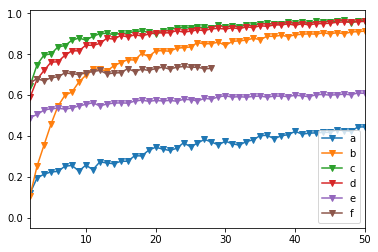

In [8]:
plt.figure()

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for k, report in enumerate(reports):

    #df_train = report['df_train']
    df_test = report['df_test']
    
    #plt.plot(df_train['epoch'], df_train['loss_avg'])
    #plt.plot(df_test['epoch'], df_test['loss_avg'])
    
    color = colors[k]
    #plt.plot(df_test['epoch'], df_test['wprob'], **{'marker': '^', 'ls': '',  'c': color})#'{}^'.format(colors[k]))
    #plt.plot(df_test['epoch'], df_test['wacc'], **{'marker': 'v', 'ls': '',  'c': color})#'{}v'.format(colors[k]))
    
    #plt.plot(df_test['epoch'], np.log2((df_test['wacc'] - df_test['wprob'])/df_test['wacc']), label='abcdefghi'[k], **{'marker': 'v', 'ls': '-',  'c': color})#'{}v'.format(colors[k]))
    
    wacc = df_test['wacc']
    wprob = df_test['wprob']
    
    y = wacc
    
    #y = #wacc * np.log2(wprob) + (1-wacc) * np.log2(1 - wprob)
    #y = - wprob * np.log2(wacc) - (1 - wprob) * np.log2(1 - wacc)

    def KLDivergence(P, Q):
        return (P * np.log2(P/Q)) + ((1-P)*np.log2((1-P)/(1-Q))) 
    
    #y = KLDivergence(wacc, wprob)
    
    plt.plot(df_test['epoch'], y, label='abcdefghi'[k], **{'marker': 'v', 'ls': '-',  'c': color})#'{}v'.format(colors[k]))
   
    #if len(df_test['epoch']) == 3:
    #    print(report['file_name'])
    
    print('({}) = {}'.format('abcdefghi'[k], report['model_name']))
    
    #plt.yscale('log')
    #plt.xlabel('epoca')
    #plt.ylabel('log(J)')
    #plt.title(report['model_name'])
    plt.xlim([2, 50])
    plt.legend()
    #plt.yscale('log')
    #plt.ylim([0, 0.2])

(a) = RMchD
(b) = C5o6C5o12C5o36C5o12MaxRfl100MchD
(c) = C5o6C5o12C5o36C5o36Rfl200MchD
(d) = C5o6C5o12C5o36C5o36Rfl100MchD
(e) = C5o6RMchD
(f) = C5o6C5o12RMchD


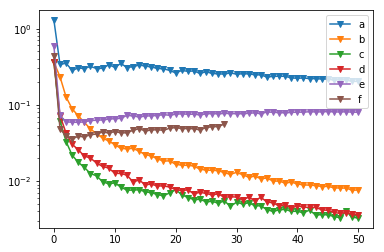

In [75]:
plt.figure()

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for k, report in enumerate(reports):

    #df_train = report['df_train']
    df_test = report['df_test']
    
    #plt.plot(df_train['epoch'], df_train['loss_avg'])
    #plt.plot(df_test['epoch'], df_test['loss_avg'])
    
    color = colors[k]
    #plt.plot(df_test['epoch'], df_test['wprob'], **{'marker': '^', 'ls': '',  'c': color})#'{}^'.format(colors[k]))
    #plt.plot(df_test['epoch'], df_test['wacc'], **{'marker': 'v', 'ls': '',  'c': color})#'{}v'.format(colors[k]))
    
    #plt.plot(df_test['epoch'], np.log2((df_test['wacc'] - df_test['wprob'])/df_test['wacc']), label='abcdefghi'[k], **{'marker': 'v', 'ls': '-',  'c': color})#'{}v'.format(colors[k]))
    
    #wacc = df_test['wacc']
    #wprob = df_test['wprob']
    
    #y = (wacc - wprob)/wacc
    
    #y = #wacc * np.log2(wprob) + (1-wacc) * np.log2(1 - wprob)
    #y = - wprob * np.log2(wacc) - (1 - wprob) * np.log2(1 - wacc)

    def KLDivergence(P, Q):
        return (P * np.log2(P/Q)) + ((1-P)*np.log2((1-P)/(1-Q))) 
    
    y = df_test['loss_avg']
    
    #y = KLDivergence(wacc, wprob)
    
    plt.plot(df_test['epoch'], y, label='abcdefghi'[k], **{'marker': 'v', 'ls': '-',  'c': color})#'{}v'.format(colors[k]))
   
    #if len(df_test['epoch']) == 3:
    #    print(report['file_name'])
    
    print('({}) = {}'.format('abcdefghi'[k], report['model_name']))
    
    plt.yscale('log')
    #plt.xlabel('epoca')
    #plt.ylabel('log(J)')
    #plt.title(report['model_name'])
    #plt.xlim([2, 50])
    plt.legend()
    #plt.yscale('log')
    #plt.ylim([0, 0.2])

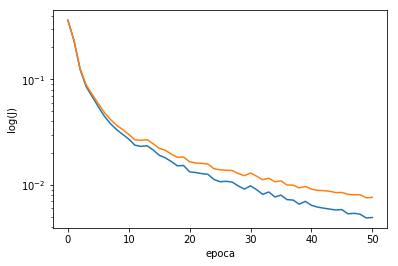

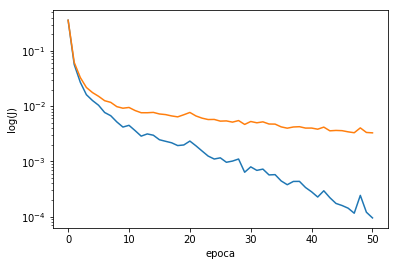

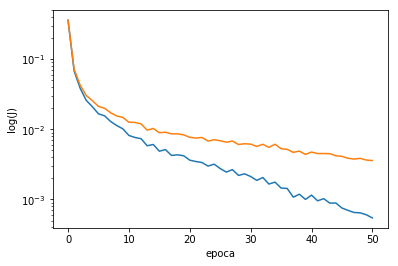

In [9]:
for report in reports:
    plt.figure()
    df_train = report['df_train']
    df_test = report['df_test']
    
    plt.plot(df_train['epoch'], df_train['loss_avg'])
    plt.plot(df_test['epoch'], df_test['loss_avg'])
    
    plt.yscale('log')
    plt.xlabel('epoca')
    plt.ylabel('log(J)')
    plt.title(report['model_name'])


C5o6C5o12C5o36C5o12MaxRfl100MchD(92.25) -> 	0.9126 	@8.262359569602543 	@9.915%0.0069
C5o6C5o12C5o36C5o36Rfl200MchD(535.05) -> 	0.9632 	@4.4812714199887385 	@5.378%0.0004
C5o6C5o12C5o36C5o36Rfl100MchD(290.25) -> 	0.9606 	@4.280502079857721 	@5.137%0.0004


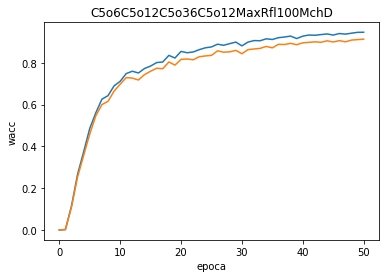

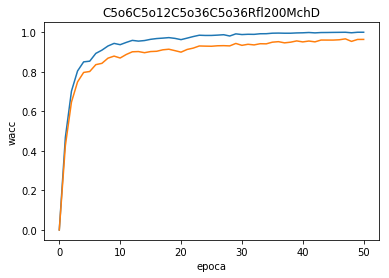

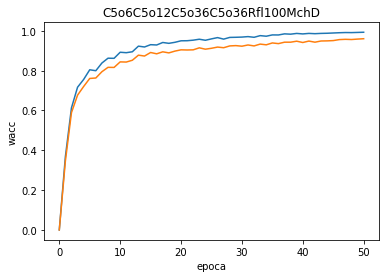

In [47]:
for report in reports:
    plt.figure()
    df_train = report['df_train']
    df_test = report['df_test']
    
    ytrain = df_train['wacc']
    ytest = df_test['wacc']
    xtrain = df_train['epoch']
    xtest = df_test['epoch']

    
    #ytrain = np.log(1 + df_train['wacc'])
    #ytest = np.log(1 + df_test['wacc'])
    #xtrain = np.log(df_train['epoch'] + 1)
    #xtest = np.log(df_test['epoch'] + 1)

    
    plt.plot(xtrain, ytrain)
    plt.plot(xtest, ytest)
    
    #plt.yscale('log')
    plt.xlabel('epoca')
    plt.ylabel('wacc')
    plt.title(report['model_name'])
    
    time_series = df_test['total_time'].as_matrix()
    time_series = time_series[1:]
    
    name, size, acc_max, time = report['model_name'], report['model_size'], df_test['wacc'].as_matrix()[-1], time_series.sum()/(60*60)
    mean_time, std_time = time_series.mean()/(60), time_series.std()/(60) 
    
    print('{}({}) -> \t{} \t@{} \t@{:.3f}%{:.4f}'.format(name, size/1e3, acc_max, time, mean_time, std_time/mean_time))

In [25]:
chosen_model = 'C5o6C5o12C5o36C5o36Rfl100MchD'
model_report = {report['model_name']: report for report in reports}
report = model_report[chosen_model]

Text(0.5,1,'wacc,wprob teste')

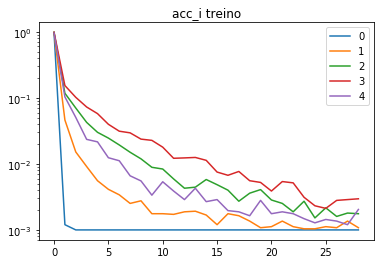

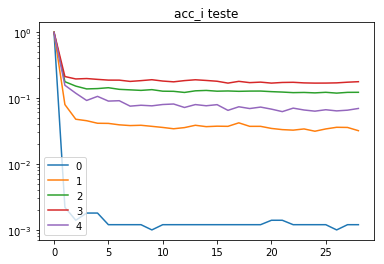

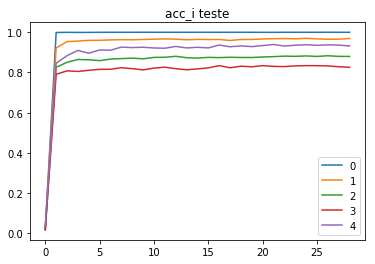

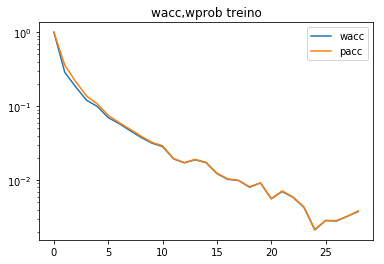

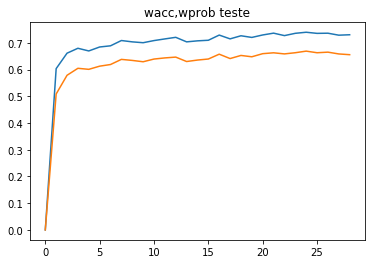

In [13]:
df_train = report['df_train']
df_test = report['df_test']
x = report['df_test']['epoch']

plt.figure()
for k in range(5):    
    plt.plot(x, 1 - df_train['acc_{}'.format(k)] + 1e-3, label=str(k))

plt.legend()
plt.title('acc_i treino')
plt.yscale('log')

plt.figure()
for k in range(5):    
    plt.plot(x, (1- df_test['acc_{}'.format(k)]) + 1e-3, label=str(k))

plt.legend()
plt.title('acc_i teste')
plt.yscale('log')


plt.figure()
for k in range(5):    
    plt.plot(x, df_test['acc_{}'.format(k)], label=str(k))

plt.legend()
plt.title('acc_i teste')

plt.figure()
plt.plot(x, 1 - df_train['wacc'], label='wacc')
plt.plot(x, 1 - df_train['wprob'], label='pacc')

plt.legend()
plt.yscale('log')
plt.title('wacc,wprob treino')


plt.figure()
plt.plot(x, df_test['wacc'] + 1e-6)
plt.plot(x, df_test['wprob'] + 1e-6)
plt.title('wacc,wprob teste')

(array([0.96, 0.97, 0.98, 0.99, 1.  , 1.01]),
 <a list of 6 Text yticklabel objects>)

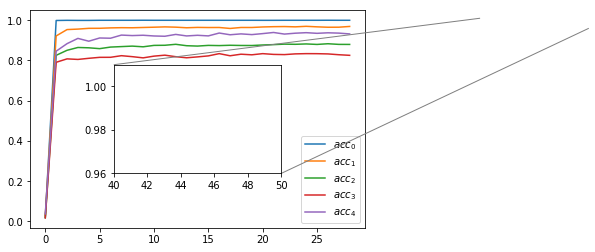

In [14]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.figure()
ax = plt.gca()

for k in range(5):
    ax.plot(x, df_test['acc_{}'.format(k)], label='$acc_{}$'.format(k))
    
plt.legend()
#plt.title('acc_i teste')


#, axes_kwargs={'xlim': [40, 50], 'ylim': [0.8, 1]}
axins = inset_axes(ax, '50%', '50%', loc=10, axes_kwargs={'xlim': [40, 50], 'ylim': [0.96, 1.01]})
for k in range(5):
    axins.plot(x, df_test['acc_{}'.format(k)])

plt.xticks(visible=False)
plt.yticks(visible=False)

    
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

#xins = zoomed_inset_axes(ax, 5, loc=10)

plt.xticks(visible=True)
plt.yticks(visible=True)


Text(0.5,1,'wacc,wprob treino e yesye')

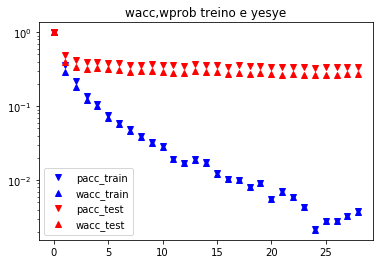

In [15]:
plt.figure()

plt.plot(x, 1 - df_train['wprob'], 'bv', label='pacc_train')
plt.plot(x, 1 - df_train['wacc'], 'b^', label='wacc_train')
#plt.plot(x, 1 - (df_train['wprob']+df_train['wacc'])/2, 'g-', label='pacc_train')



plt.plot(x, 1 - df_test['wprob'], 'rv', label='pacc_test')
plt.plot(x, 1 - df_test['wacc'], 'r^', label='wacc_test')

plt.legend()
plt.yscale('log')
plt.title('wacc,wprob treino e yesye')


In [56]:
report['df_test']['wacc']

0     0.0000
1     0.3458
2     0.5892
3     0.6770
4     0.7206
5     0.7610
6     0.7632
7     0.7948
8     0.8168
9     0.8164
10    0.8442
11    0.8434
12    0.8524
13    0.8780
14    0.8736
15    0.8914
16    0.8848
17    0.8948
18    0.8894
19    0.8984
20    0.9048
21    0.9040
22    0.9048
23    0.9148
24    0.9080
25    0.9126
26    0.9186
27    0.9154
28    0.9244
29    0.9260
30    0.9230
31    0.9292
32    0.9244
33    0.9336
34    0.9300
35    0.9394
36    0.9360
37    0.9432
38    0.9432
39    0.9482
40    0.9416
41    0.9488
42    0.9432
43    0.9492
44    0.9498
45    0.9512
46    0.9562
47    0.9576
48    0.9566
49    0.9588
50    0.9606
Name: wacc, dtype: float64

In [19]:
def plot_report(df_report, fig=0):
    shape = df_report.shape
    plt.figure(fig)
    for i in range(5):
        plt.plot(list(range(shape[0])),df_report['acc_{}'.format(i)] )




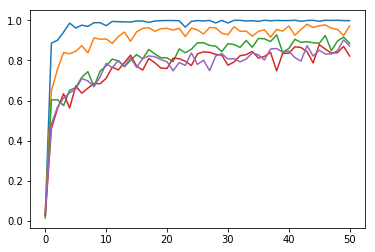

In [20]:
plot_report(report['df_train'])

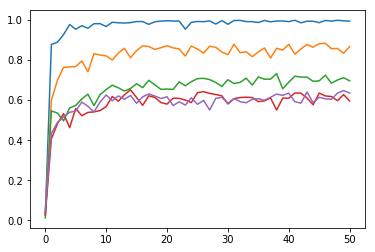

In [21]:
plot_report(report['df_test'])

In [7]:
report['model']

['models.base.InputLayer((?, 50, 200, 3) -> (?, 50, 200, 3))',
 'models.base.LinearReshapeLayer((?, 50, 200, 3) -> (?, 30000))',
 'models.linear.LinearMultiCharOutputLayer((?, 30000) -> (?, 5, 36))']

In [49]:
import re

report = open_report('ad32aeb8-ce73-4f8f-a364-88a365911258.pkl')


size_pattern = '\((.*) -> (.*)\)'
one_int_pattern = '\(\?, (\d*)\)'
two_int_pattern = '\(\?, (\d*), (\d*)\)'
three_int_pattern = '\(\?, (\d*), (\d*), (\d*)\)'
four_int_pattern = '\(\?, (\d*), (\d*), (\d*), (\d*)\)'

def LinearMultiCharSise(layer_str):
    in_ptr = re.search(size_pattern, layer_str).group(1)
    out_ptr = re.search(size_pattern, layer_str).group(2)
    input_size = int(re.findall(one_int_pattern, in_ptr)[0])
    num_classifiers, num_chars = map(int, re.findall(two_int_pattern, out_ptr)[0])    
    return num_classifiers * (input_size * num_chars)


def ConvLayerSise(layer_str):
    in_ptr = re.search(size_pattern, layer_str).group(1)
    out_ptr = re.search(size_pattern, layer_str).group(2)

    #print(in_ptr, out_ptr)
    #print(re.findall(three_int_pattern, in_ptr), re.findall(three_int_pattern, out_ptr))
    
    print(list(map(int, re.findall(three_int_pattern, in_ptr)[0])))
    print(list(map(int, re.findall(three_int_pattern, out_ptr)[0])))
    return 0

    
layer_size_parser = {
    'InputLayer': lambda ptr: 0,
    'LinearReshapeLayer': lambda ptr: 0,
    'LinearMultiCharOutputLayer': LinearMultiCharSise,
    'ConvLayer': ConvLayerSise,
    
}

for l in report['model']:
    for k, ptr_map in layer_size_parser.items():
        if k in l:
            print(ptr_map(l))
            break
    else:
        raise Exception('Layer not defined')
    



file_name: ad32aeb8-ce73-4f8f-a364-88a365911258.pkl
model:['models.base.InputLayer((?, 50, 200, 3) -> (?, 50, 200, 3))', 'models.conv.ConvLayer((?, 50, 200, 3) -> (?, 50, 200, 6))', 'models.conv.ConvLayer((?, 50, 200, 6) -> (?, 25, 100, 12))', 'models.base.LinearReshapeLayer((?, 25, 100, 12) -> (?, 30000))', 'models.linear.LinearMultiCharOutputLayer((?, 30000) -> (?, 5, 36))']
0
[50, 200, 3]
[50, 200, 6]
0
[50, 200, 6]
[25, 100, 12]
0
0
5400000


In [30]:

'models.conv.ConvLayer((?, 50, 200, 6) -> (?, 25, 100, 12))'

'30000'

In [35]:
5 * (3000 * 36)

540000

In [37]:
files

['f97d240f-4517-4c9d-b0ef-8164b330d519.pkl']

In [51]:
import seaborn

In [59]:
report['df_test']['train_time'][1:].mean(), report['df_test']['train_time'][1:].std()
report['df_test']['total_time'][1:].mean(), report['df_test']['total_time'][1:].std()

(235.81018999099732, 0.09501519079941638)

In [62]:
def accumulate(series):
    _sum = 0
    for s in series:
        _sum += s
        yield _sum
        
list(accumulate(report['df_test']['train_time']))

51


file_name: f97d240f-4517-4c9d-b0ef-8164b330d519.pkl
model:['models.base.InputLayer((?, 50, 200, 3) -> (?, 50, 200, 3))', 'models.base.LinearReshapeLayer((?, 50, 200, 3) -> (?, 30000))', 'models.linear.LinearMultiCharOutputLayer((?, 30000) -> (?, 5, 36))']


/home/diogo/.virtualenvs/tensorgpu/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0,0.5,'acurácia')

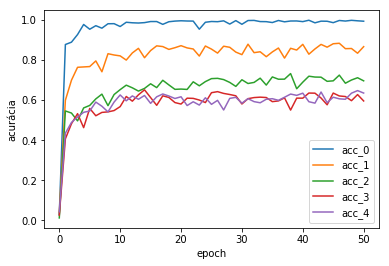

In [66]:
report = open_report('f97d240f-4517-4c9d-b0ef-8164b330d519.pkl')

report['df_test'].plot(x='epoch', y=['acc_0', 'acc_1', 'acc_2', 'acc_3', 'acc_4'])
plt.ylabel('acurácia')

In [63]:
report['df_test'].columns

Index(['acc_0', 'acc_1', 'acc_2', 'acc_3', 'acc_4', 'epoch', 'loss_0',
       'loss_1', 'loss_2', 'loss_3', 'loss_4', 'loss_avg', 'total_time',
       'train_time', 'wacc', 'wprob'],
      dtype='object')

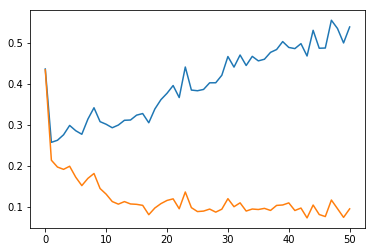

In [69]:
plt.plot(list(range(51)), report['df_test']['loss_avg'])
plt.plot(list(range(51)), report['df_train']['loss_avg'])

In [88]:
x, y = np.array([float(k) for k in range(51)]), report['df_test']['loss_avg']

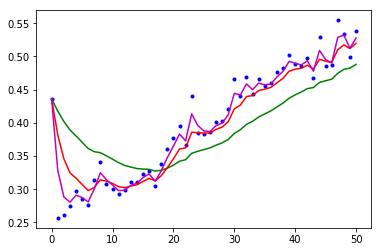

In [90]:
def smooth(ys, alpha=0.1):
    _ys = []
    _y = ys[0]
    for y in ys:
        _y = (1 - alpha) * _y + alpha * y
        _ys.append(_y)
    
    return _ys

plt.plot(x, y, 'b.')
plt.plot(x, smooth(y, 0.1), 'g-')
plt.plot(x, smooth(y, 0.3), 'r-')
plt.plot(x, smooth(y, 0.6), 'm-')

Text(0,0.5,'J')

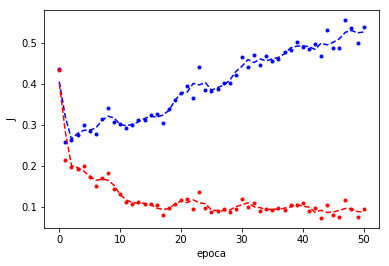

In [120]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

def ffit(x, a0, a1, a2, a3, a4):
    return a0 + a1 * x + a2 * x*x#np.exp(a2*x) + a3 * np.exp(-a4*x)




#popt, pcov = curve_fit(ffit, x, y)
#print(popt)
#plt.plot(x, ffit(x, *popt), 'g-')


plt.plot(x, y, 'b.')
plt.plot(x, savgol_filter(y, 3, 1, mode='interp'), 'b--')
plt.plot(x, report['df_train']['loss_avg'], 'r.')
plt.plot(x, savgol_filter(report['df_train']['loss_avg'], 3, 1, mode='interp'), 'r--')

plt.xlabel('epoca')
plt.ylabel('J')
#plt.plot(x, smooth(y, 0.3), 'r-')
#plt.plot(x, smooth(y, 0.6), 'm-')

In [92]:
ffit(x, *popt)

array([ 4.32184399e-01, -1.16056563e+02, -1.17922162e+02, -1.17952040e+02,
       -1.17952519e+02, -1.17952527e+02, -1.17952527e+02, -1.17952527e+02,
       -1.17952527e+02, -1.17952527e+02, -1.17952527e+02, -1.17952527e+02,
       -1.17952527e+02, -1.17952527e+02, -1.17952527e+02, -1.17952527e+02,
       -1.17952527e+02, -1.17952527e+02, -1.17952526e+02, -1.17952526e+02,
       -1.17952525e+02, -1.17952521e+02, -1.17952512e+02, -1.17952488e+02,
       -1.17952421e+02, -1.17952242e+02, -1.17951757e+02, -1.17950450e+02,
       -1.17946921e+02, -1.17937398e+02, -1.17911698e+02, -1.17842340e+02,
       -1.17655163e+02, -1.17150021e+02, -1.15786778e+02, -1.12107747e+02,
       -1.02179023e+02, -7.53840420e+01, -3.07152307e+00,  1.92080708e+02,
        7.18744607e+02,  2.14007021e+03,  5.97584950e+03,  1.63275963e+04,
        4.42642040e+04,  1.19657668e+05,  3.23124550e+05,  8.72227478e+05,
        2.35411005e+06,  6.35331645e+06,  1.71461095e+07])

In [93]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

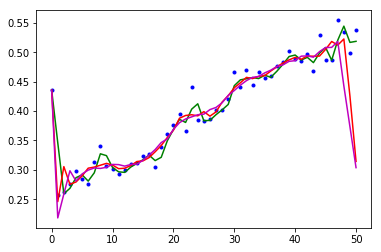

In [114]:

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    
    y_smooth[0] = y[0]
    return y_smooth


plt.plot(x, y, 'b.')
plt.plot(x, smooth(y, 2), 'g-')
plt.plot(x, smooth(y, 5), 'r-')
plt.plot(x, smooth(y, 7), 'm-')

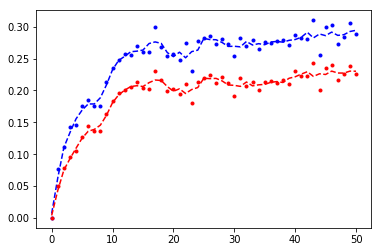

In [122]:
x, y1, y2 = np.array([float(k) for k in range(51)]), report['df_test']['wacc'], report['df_test']['wprob']


plt.plot(x, y1, 'b.')
plt.plot(x, savgol_filter(y1, 3, 1, mode='interp'), 'b--')

plt.plot(x, y2, 'r.')
plt.plot(x, savgol_filter(y2, 3, 1, mode='interp'), 'r--')

#plt.plot(x, y, 'b.')
#plt.plot(x, savgol_filter(y, 3, 1, mode='interp'), 'b--')
#plt.plot(x, report['df_train']['loss_avg'], 'r.')
#plt.plot(x, savgol_filter(report['df_train']['loss_avg'], 3, 1, mode='interp'), 'r--')

#plt.xlabel('epoca')
#plt.ylabel('J')


In [123]:
list(report.keys())

['df_train', 'model', 'df_test', 'lrange']

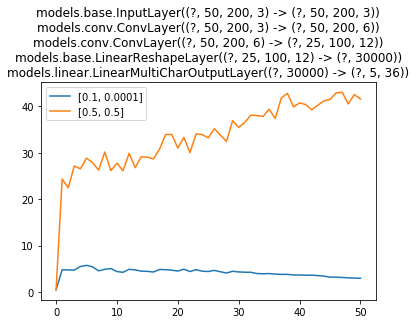

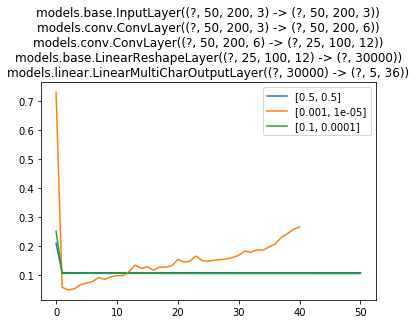

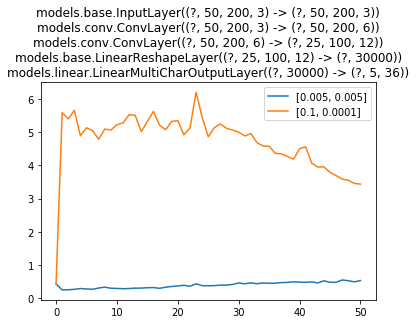

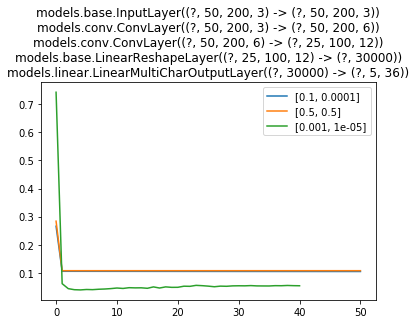

In [142]:
reports_by_model = {}

for fname in pickle_files:
    report = open_report(fname, verbose=False)
    model_spec = str(report['model'])
    
    if not reports_by_model.get(model_spec, None):
        reports_by_model[model_spec] = []
    
    reports_by_model[model_spec].append(report)

for model_spec, experiments in reports_by_model.items():
    plt.figure()
    plt.title('\n'.join(report['model']))
    for experiment in experiments:
        cost = experiment['df_test']['loss_avg']
        x = np.arange(len(cost))
        plt.plot(x, cost, label=list(reversed(experiment['lrange'])))
    plt.legend()

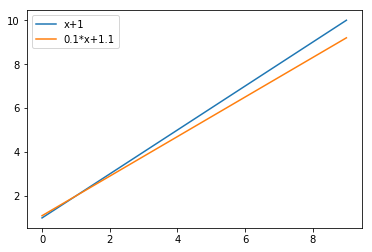

In [138]:
x = np.arange(10)
plt.plot(x, x+1, label='x+1')
plt.plot(x, 0.9*x+1.1, label='0.1*x+1.1')


In [29]:
df_train.columns

Index(['acc_0', 'acc_1', 'acc_2', 'acc_3', 'acc_4', 'epoch', 'loss_0',
       'loss_1', 'loss_2', 'loss_3', 'loss_4', 'loss_avg', 'total_time',
       'train_time', 'wacc', 'wprob'],
      dtype='object')